In [8]:
using Pkg
Pkg.activate((@__DIR__) * "/../one_flav_env")

import DelimitedFiles: readdlm
using DataFrames
using CSV
using LaTeXStrings
using PythonPlot

rc("font", family="serif", serif="Computer Modern", size=14)
rc("figure", autolayout=true)
rc("axes", labelsize=16, unicode_minus=false)
rc("text", usetex=true)
rc("text.latex", preamble=raw"\usepackage{slashed}")

golden_ratio = (1+sqrt(5))/2

MG_RESULTS_DIR = (@__DIR__) * "/../madgraph/data/"
FIGDIR = "./"

DIR_mumu = MG_RESULTS_DIR * "LLP_scan/mumu_to_phiphi/"
DIR_AZ = MG_RESULTS_DIR * "xsec/AZ_to_phiphi_xsec/"
DIR_WW = MG_RESULTS_DIR * "xsec/WW_to_phiphi_xsec/"

RUN_RESULTS_FILENAME = "run_info.csv"

function load_run_info(mgdir)
    CSV.read(mgdir*RUN_RESULTS_FILENAME, DataFrame)
end

function load_xsecs(dir, rts_tev)
    rts_gev = 1e3*rts_tev
    run_info = load_run_info(dir)
    idxs = findall(x -> x ≈ rts_gev, run_info.rts)
    return (xsecs=run_info.xsec[idxs], mphis=run_info.mphi[idxs])
end
;

  Activating project at `~/Dropbox (University of Oregon)/MuC/Aria/one_flav/code/one_flav_env`


In [10]:
xsecs = [load_xsecs.(d, [3,10]) for d in [DIR_mumu, DIR_AZ, DIR_WW]];

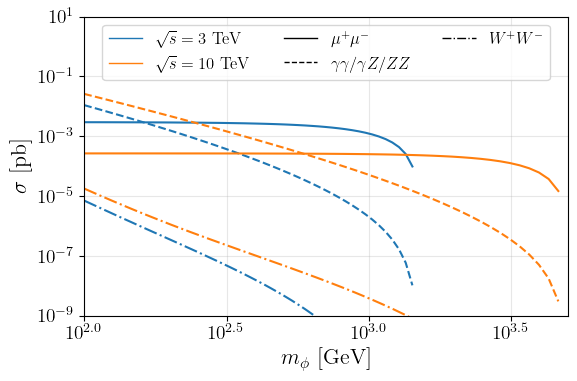

In [12]:
colors = ["tab:blue", "tab:orange"]
lines = ["solid", "dashed", "dashdot"]

clabels = [L"$\sqrt{s} = 3$ TeV", L"$\sqrt{s} = 10$ TeV"]
llabels = [L"\mu^+ \mu^-", L"\gamma \gamma / \gamma Z / Z Z",
            L"W^+ W^-"]

f = figure(figsize=(6,6))

for i in 1:2
    for j in 1:3
        plot(log10.(xsecs[j][i].mphis), log10.(xsecs[j][i].xsecs),
            color=colors[i], linestyle=lines[j])
    end
end

xlim(2, log10(5e3))
ylim(-9, 1)

grid(alpha=0.3)

ax = gca()

xticks = 2:.5:3.5
yticks = -9:2:1

xticklabels = [L"10^{%$(round(x, sigdigits=2))}" for x in xticks]
yticklabels = [L"10^{%$(round(Int,x))}" for x in yticks]

ax.set_xticks(xticks, xticklabels)
ax.set_yticks(yticks, yticklabels)

ax.set_aspect((log10(5e3)-2)/((1+9)*golden_ratio))

for i in 1:2
    plot(0, Inf, lw=1., c=colors[i], label=clabels[i])
end

for j in 1:3
    plot(0, Inf, lw=1., c="black", linestyle=lines[j], label=llabels[j])
end

legend(fontsize=12, ncol=3, loc="upper center")

xlabel(L"$m_\phi$ [GeV]")
ylabel(L"$\sigma$ [pb]")

plotclose()
# f.savefig(FIGDIR*"xsecs.pdf", bbox_inches="tight")
f